# Chatbot Using the Langgraph and LangSmith

## Prerequisites and Installations

In [ ]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 888.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.2/396.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!pip install langchain langchain_groq langchain_community

In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
# print(groq_api_key)

In [ ]:
langsmith_api_key = userdata.get('langsmith_api_key')
# print(langsmith_api_key)

In [ ]:
import os
os.environ["langsmith_api_key"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LangGraph"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm = ChatGroq(groq_api_key = groq_api_key, model_name = "llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x79149956f460>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x79149957b190>, model_name='llama3-8b-8192', groq_api_key=SecretStr('**********'))

## Building the Chatbot Using the Langgraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)
print(graph_builder)

In [ ]:
def chatbot(state:State):
  return {"messages": llm.invoke(state["messages"])}

graph_builder.add_node("chatbot", chatbot)

In [ ]:
print(graph_builder)

In [ ]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [ ]:
graph = graph_builder.compile()

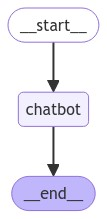

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input = input("Enter Input: ")
  if user_input.lower() in ["quit", "q", "exit"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages' : ("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value["messages"])
      print("Assistant: ", value["messages"].content)

Enter Input: what is my name
dict_values([{'messages': AIMessage(content="I'm happy to help! However, I'm a large language model, I don't have the ability to know your personal information, including your name. Each time you interact with me, it's a new conversation, and I don't retain any information from previous conversations.\n\nIf you'd like to share your name with me, I'm here to listen and chat with you!", response_metadata={'token_usage': {'completion_tokens': 77, 'prompt_tokens': 14, 'total_tokens': 91, 'completion_time': 0.064166667, 'prompt_time': 0.003082271, 'queue_time': 0.012244798000000001, 'total_time': 0.067248938}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-8a99010b-d4b9-43bf-9edb-07d79742acff-0', usage_metadata={'input_tokens': 14, 'output_tokens': 77, 'total_tokens': 91})}])
content="I'm happy to help! However, I'm a large language model, I don't have the ability to know your personal i

Enter Input: who are you


dict_values([{'messages': AIMessage(content="I am LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm not a human, but a computer program designed to simulate conversation and answer questions to the best of my knowledge.\n\nI'm a large language model, which means I've been trained on a massive dataset of text from various sources, including books, articles, and online conversations. This training enables me to understand and generate human-like language.\n\nI can assist with a wide range of topics, including but not limited to:\n\n1. Answering questions: I can provide information on various topics, from science and history to entertainment and culture.\n2. Generating text: I can create text based on a prompt or topic, and even help with writing tasks such as proofreading and editing.\n3. Translation: I can translate text from one language to another, including popular languages like Spanish, French, Chinese, and mo

Enter Input: quit
Good Bye
